In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

## Cleaning the Data

In [110]:
# Both clinically diagnosed and lab-confirmed cases
# Source: https://www.kaggle.com/c/covid19-global-forecasting-week-2

train_data = os.path.join('resources','train.csv')
train_df = pd.read_csv(train_data)
train_df = train_df[['Province_State','Country_Region','Date','ConfirmedCases','Fatalities']]
train_df['Province_State'] = train_df['Province_State'].fillna('')
# train_df.head()

## Confirmed Cases Data

In [111]:
confirmed_df = train_df.pivot_table(index=['Country_Region','Province_State'], columns='Date', values='ConfirmedCases')
confirmed_df = confirmed_df.groupby('Country_Region').sum()
confirmed_df.head()

Date,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2020-03-16,2020-03-17,2020-03-18,2020-03-19,2020-03-20,2020-03-21,2020-03-22,2020-03-23,2020-03-24,2020-03-25
Country_Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,21.0,22.0,22.0,22.0,24.0,24.0,40.0,40.0,74.0,84.0
Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,51.0,55.0,59.0,64.0,70.0,76.0,89.0,104.0,123.0,146.0
Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,54.0,60.0,74.0,87.0,90.0,139.0,201.0,230.0,264.0,302.0
Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,39.0,39.0,53.0,75.0,88.0,113.0,133.0,164.0,188.0
Angola,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,2.0,2.0,3.0,3.0,3.0


### Top Ten Countries with Highest Number of Confirmed Cases

In [112]:
n = 10
last_day = confirmed_df.columns[-1]
top_confirmed_df = confirmed_df.nlargest(n, last_day)
top_confirmed_df

Date,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2020-03-16,2020-03-17,2020-03-18,2020-03-19,2020-03-20,2020-03-21,2020-03-22,2020-03-23,2020-03-24,2020-03-25
Country_Region,,,,,,,,,,,,,,,,,,,,,
China,548.0,643.0,920.0,1406.0,2075.0,2877.0,5509.0,6087.0,8141.0,9802.0,...,81033.0,81058.0,81102.0,81156.0,81250.0,81305.0,81435.0,81498.0,81591.0,81661.0
Italy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,27980.0,31506.0,35713.0,41035.0,47021.0,53578.0,59138.0,63927.0,69176.0,74386.0
US,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4565.0,6353.0,7715.0,13608.0,19025.0,25414.0,33663.0,43586.0,53659.0,65701.0
Spain,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9942.0,11748.0,13910.0,17963.0,20410.0,25374.0,28768.0,35136.0,39885.0,49515.0
Germany,0.0,0.0,0.0,0.0,0.0,1.0,4.0,4.0,4.0,5.0,...,7272.0,9257.0,12327.0,15320.0,19848.0,22213.0,24873.0,29056.0,32986.0,37323.0
Iran,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,14991.0,16169.0,17361.0,18407.0,19644.0,20610.0,21638.0,23049.0,24811.0,27017.0
France,0.0,0.0,2.0,3.0,3.0,3.0,4.0,5.0,5.0,5.0,...,6683.0,7715.0,9124.0,10970.0,12758.0,14463.0,16243.0,20123.0,22622.0,25600.0
Switzerland,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2200.0,2700.0,3028.0,4075.0,5294.0,6575.0,7474.0,8795.0,9877.0,10897.0
United Kingdom,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,1551.0,1960.0,2642.0,2716.0,4014.0,5067.0,5745.0,6726.0,8164.0,9640.0


## Fatalities Data

In [113]:
fatalities_df = train_df.pivot_table(index=['Country_Region','Province_State'], columns='Date', values='Fatalities')
fatalities_df = fatalities_df.groupby('Country_Region').sum()
fatalities_df.head()

Date,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2020-03-16,2020-03-17,2020-03-18,2020-03-19,2020-03-20,2020-03-21,2020-03-22,2020-03-23,2020-03-24,2020-03-25
Country_Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0
Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,2.0,2.0,2.0,2.0,2.0,4.0,5.0,5.0
Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,4.0,7.0,9.0,11.0,15.0,17.0,17.0,19.0,21.0
Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
Angola,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Top Ten Countries with Highest Number of Fatalities

In [114]:
top_fatalities_df = fatalities_df.nlargest(n, last_day)
top_fatalities_df

Date,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2020-03-16,2020-03-17,2020-03-18,2020-03-19,2020-03-20,2020-03-21,2020-03-22,2020-03-23,2020-03-24,2020-03-25
Country_Region,,,,,,,,,,,,,,,,,,,,,
Italy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2158.0,2503.0,2978.0,3405.0,4032.0,4825.0,5476.0,6077.0,6820.0,7503.0
Spain,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,342.0,533.0,623.0,830.0,1043.0,1375.0,1772.0,2311.0,2808.0,3647.0
China,17.0,18.0,26.0,42.0,56.0,82.0,131.0,133.0,171.0,213.0,...,3217.0,3230.0,3241.0,3249.0,3253.0,3259.0,3274.0,3274.0,3281.0,3285.0
Iran,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,853.0,988.0,1135.0,1284.0,1433.0,1556.0,1685.0,1812.0,1934.0,2077.0
France,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,149.0,149.0,149.0,244.0,451.0,563.0,676.0,862.0,1102.0,1333.0
US,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,85.0,108.0,118.0,200.0,244.0,307.0,426.0,551.0,705.0,941.0
United Kingdom,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,56.0,56.0,72.0,138.0,178.0,234.0,282.0,336.0,423.0,466.0
Netherlands,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,24.0,43.0,58.0,77.0,107.0,137.0,180.0,214.0,277.0,357.0
Germany,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,17.0,24.0,28.0,44.0,67.0,84.0,94.0,123.0,157.0,206.0


## Charting Actual COVID-19 Spread

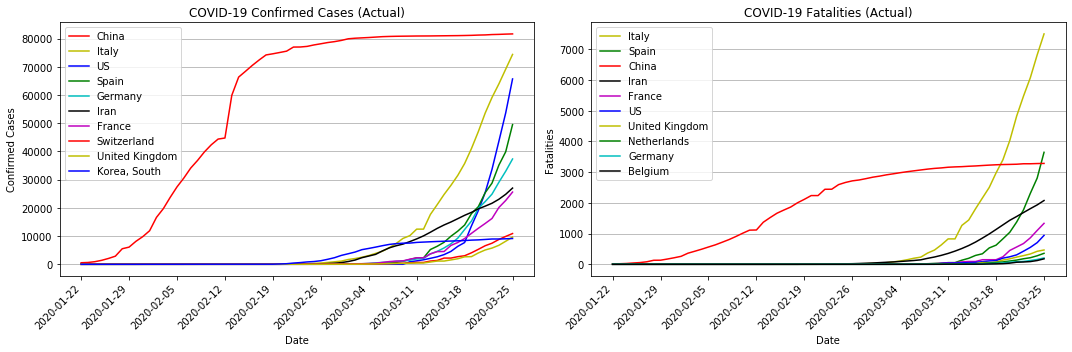

In [115]:
# x-axis
dates = confirmed_df.columns.tolist()   # dates in string format
days = range(len(dates))                # number of days

# y-axis: Confirmed Cases
c_countries = top_confirmed_df.index      # list of countries
top_confirmed = top_confirmed_df.values.tolist()  # total confirmed cases

# y-axis: Fatalities
f_countries = top_fatalities_df.index      # list of countries
top_fatalities = top_fatalities_df.values.tolist()  # total fatalities

# Subplots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize = (15,5))

# x-axis labels
xticks = [day*7 for day in days]   # per week
xlabels = dates[0::7]

ax1.set(xlabel="Date", ylabel="Confirmed Cases")
ax1.set_xticks(xticks) 
ax1.set_xticklabels(xlabels, rotation=45, ha='right')
ax2.set(xlabel="Date", ylabel="Fatalities")
ax2.set_xticks(xticks) 
ax2.set_xticklabels(xlabels, rotation=45, ha='right')

# Chart titles
ax1.set_title("COVID-19 Confirmed Cases (Actual)")
ax2.set_title("COVID-19 Fatalities (Actual)")

line_color = {'China': 'r',
          'Italy': 'y',
          'US': 'b',
          'Spain': 'g',
          'Germany': 'c',
          'Iran': 'k',
          'France': 'm',
          'Switzerland': 'r',
          'United Kingdom': 'y',
          'Korea, South': 'b',
          'Netherlands': 'g',
          'Belgium': 'k'
         }

# Confirmed Cases Line Chart
c_labels = ()
c_counter = 0

for country in c_countries:
    ax1.plot(days, top_confirmed[c_counter], 
             label = c_countries, 
             color = line_color[country], linestyle = '-')

    c_labels += (country,)
    c_counter += 1

# Fatalities Cases Line Chart
f_labels = ()
f_counter = 0
for country in f_countries:
    ax2.plot(days, top_fatalities[f_counter], 
             label = f_countries, 
             color = line_color[country], linestyle = '-')

    f_labels += (country,)
    f_counter += 1
    
# Legends and chart style    
ax1.legend(c_labels, loc='best')
ax2.legend(f_labels, loc='best')
ax1.grid(axis='y'), ax2.grid(axis='y')

# Save Image
plt.savefig("images/actual.png")
plt.tight_layout()
plt.show()

# Polynomial Regression Model

In [116]:
# Installations you may need to run this notebook
# !pip install keras
# !pip install tensorflow
# !pip install sklearn --upgrade
# !pip install joblib

# from sklearn.linear_model import LinearRegression
# from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import numpy.polynomial.polynomial as poly
from scipy.optimize import curve_fit

In [117]:
from datetime import datetime as dt

# Prediction Dates
test_data = os.path.join('resources','test.csv')
test_df = pd.read_csv(test_data)

# Start Date
start = test_df['Date'].min()
start = dt.strptime(start, '%Y-%m-%d')

# End Date
end = test_df['Date'].max()
end = dt.strptime(end, '%Y-%m-%d')

# Date Range
n_days = (end-start).days
n_days

42

### First day of Confirmed Case

In [137]:
first_confirmed = pd.DataFrame(columns=['Country', 'First Day', 'Days After China'])

for country in c_countries:
    # Grab the country's row
    row = list(top_confirmed_df.loc[top_confirmed_df.index == country].values[0])
    # Grab the column index of first non-zero value
    col_index = next((i for i, j in enumerate(row) if j.any()), None)     
    # Translate to date
    first_day = top_confirmed_df.columns[col_index]
    row = top_confirmed_df.loc
    print(row)
#     first_confirmed = first_confirmed.append({
#         'Country':country, 
#         'First Day': first_day, 
#         'Days After China': col_index,
#     }, ignore_index=True)

italy = top_confirmed_df.loc[top_confirmed_df.index == 'Italy'].values[0]
reset_index = first_confirmed['Days After China']
print(reset_index)
# italy[reset_index]


[548.0, 643.0, 920.0, 1406.0, 2075.0, 2877.0, 5509.0, 6087.0, 8141.0, 9802.0, 11891.0, 16630.0, 19716.0, 23707.0, 27440.0, 30587.0, 34110.0, 36814.0, 39829.0, 42354.0, 44386.0, 44759.0, 59895.0, 66358.0, 68413.0, 70513.0, 72434.0, 74211.0, 74619.0, 75077.0, 75550.0, 77001.0, 77022.0, 77241.0, 77754.0, 78166.0, 78600.0, 78928.0, 79356.0, 79932.0, 80136.0, 80261.0, 80386.0, 80537.0, 80690.0, 80770.0, 80823.0, 80860.0, 80887.0, 80921.0, 80932.0, 80945.0, 80977.0, 81003.0, 81033.0, 81058.0, 81102.0, 81156.0, 81250.0, 81305.0, 81435.0, 81498.0, 81591.0, 81661.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 20.0, 62.0, 155.0, 229.0, 322.0, 453.0, 655.0, 888.0, 1128.0, 1694.0, 2036.0, 2502.0, 3089.0, 3858.0, 4636.0, 5883.0, 7375.0, 9172.0, 10149.0, 12462.0, 12462.0, 17660.0, 21157.0, 24747.0, 27980.0, 31506.0, 35713.0, 41035.0, 47021.0, 53578.0, 59138.0, 63927.0, 69176.0, 74386.0]
[0.0, 0

## Charting Predicted COVID-19 Spread

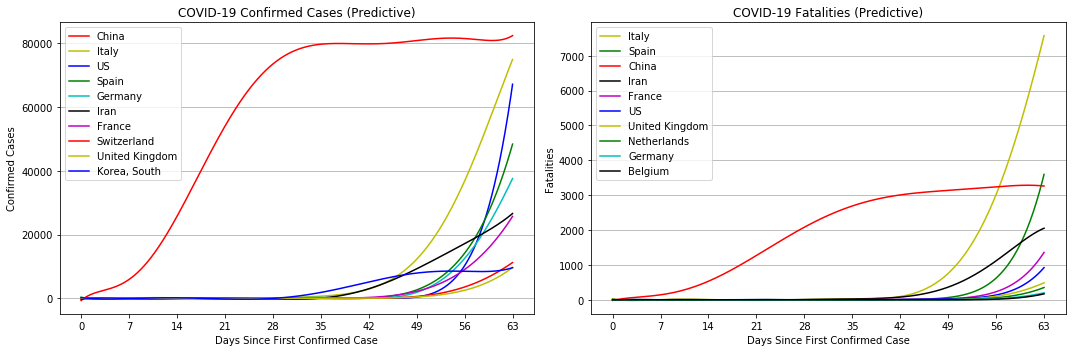

In [128]:
i_days = n_days - 1   # adjust for index
degree = 7

# Subplots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize = (15,5))

# x-axis labels
ax1.set(xlabel="Days Since First Confirmed Case", ylabel="Confirmed Cases")
ax1.set_xticks(xticks) 
ax2.set(xlabel="Days Since First Confirmed Case", ylabel="Fatalities")
ax2.set_xticks(xticks) 

# Chart titles
ax1.set_title("COVID-19 Confirmed Cases (Predictive)")
ax2.set_title("COVID-19 Fatalities (Predictive)")

# Confirmed Cases Line Chart
c_labels = ()
c_counter = 0

for country in c_countries:
    y = top_confirmed_df.loc[top_confirmed_df.index == country].values[0]
    
    c_polynomial = np.poly1d(np.polyfit(days, y, degree))
    c_polyline = np.linspace(0, days[-1], 1000)
#     c_polyline = np.linspace(days[-1], days[-1]+n_days, 1000)
    ax1.plot(c_polyline, c_polynomial(c_polyline), 
             c = line_color[country], 
             label = c_countries)

#     model_score = r2_score(y, c_polynomial(days))
#     prediction = round(c_polynomial(n_days), -3)  # rounded to 1000's

    c_labels += (country,)
    c_counter += 1
        

# Fatalities Line Chart
f_labels = ()
f_counter = 0

for country in f_countries:
    y = top_fatalities_df.loc[top_fatalities_df.index == country].values[0]
    
    f_polynomial = np.poly1d(np.polyfit(days, y, degree))
    f_polyline = np.linspace(0, days[-1], 1000)
#     f_polyline = np.linspace(days[-1], days[-1]+n_days, 1000)
    ax2.plot(f_polyline, f_polynomial(f_polyline), 
             c = line_color[country], 
             label = f_countries)

#     model_score = r2_score(y, f_polynomial(days))
#     prediction = round(f_polynomial(n_days), -3)  # rounded to 1000's
    
    f_labels += (country,)
    f_counter += 1    
    
# Legends and chart style    
ax1.legend(c_labels, loc='best')
ax2.legend(f_labels, loc='best')
ax1.grid(axis='y'), ax2.grid(axis='y')

# Save Image
plt.savefig("images/predicted.png")
plt.tight_layout()
plt.show()

## Population Density (per sqkm) (2018)

In [129]:
# Source: https://data.worldbank.org/indicator/en.pop.dnst
file = os.path.join('resources','population_density.csv')
pop_density = pd.read_csv(file, header=4, usecols=['Country Name','2018'], index_col='Country Name')
pop_density = pop_density.rename(columns={'2018':'Population Density'})
print(len(pop_density))
pop_density.head()

264


,Population Density
Country Name,
Aruba,588.027778
Afghanistan,56.937760
Angola,24.713052
Albania,104.612263
Andorra,163.842553


In [130]:
pop_density_df = pop_density.join(confirmed_df, how='inner')
print(len(pop_density_df))
pop_density_df.head()

151


,Population Density,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,...,2020-03-16,2020-03-17,2020-03-18,2020-03-19,2020-03-20,2020-03-21,2020-03-22,2020-03-23,2020-03-24,2020-03-25
Afghanistan,56.937760,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,21.0,22.0,22.0,22.0,24.0,24.0,40.0,40.0,74.0,84.0
Angola,24.713052,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,2.0,2.0,3.0,3.0,3.0
Albania,104.612263,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,51.0,55.0,59.0,64.0,70.0,76.0,89.0,104.0,123.0,146.0
Andorra,163.842553,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,39.0,39.0,53.0,75.0,88.0,113.0,133.0,164.0,188.0
United Arab Emirates,135.609110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,...,98.0,98.0,113.0,140.0,140.0,153.0,153.0,198.0,248.0,333.0


## Population Demographics

## Pre-existing Health Conditions/Burden of Disease